# 03-1. 검색 알고리즘이란?

- 데이터 집합에서 원하는 값을 가진 원소를 찾아내는 검색 알고리즘

## 검색과 키
- 키(key) : 데이터 내 검색 조건에서 어떠한 항목에 주목 하는 것
- 조건에 대해 하나 혹은 논리곱, 논리합을 사용하여 복합해서 지정 가능

## 검색의 종류
- 선택할 수 있는 알고리즘이 다양한 경우에는 용도, 목적, 실행 속도, 자료구조 등 여러 사항을 고려해서 선택해야 함



> 자료구조 알고리즘
- ex. **배열 검색**, 연결 리스트 검색, 이진 검색 트리, 일부 문자열 검색


> 배열 검색
- 선형 검색 : 무작위로 늘어놓은 데이터 집합에서 검색 수행
- 이진 검색 : 일정한 규칙으로 늘어놓은 데이터 집합에서 아주 빠른 검색 수행
- 해시법 : 추가&삭제가 자주 일어나는 데이터 집합에서 아주 빠른 검색을 수행
  - 체인법 : 같은 해시값 데이터를 연결 리스트로 연결하는 방법
  - 오픈 주소법 : 데이터를 위한 해시값이 충돌할 때 재해시하는 방법   



#03-2. 선형 검색

## 선형 검색

- 선형 검색(linear search) : 직선 모양(선형)으로 늘어선 배열에서 검색하는 경우에 원하는 키값을 가진 원소를 찾을 때까지 맨 앞부터 스캔하여 순서대로 검색하는 알고리즘
- 가장 기본적인 알고리즘
- **원소의 값이 정렬되지 않은 배열에서 검색할 때 사용하는 유일한 방법**

> 선형 검색의 종료 조건
- 검색할 값을 찾지 못하고 배열의 맨 끝을 지나간 경우
- 검색할 값과 같은 원소를 찾는 경우



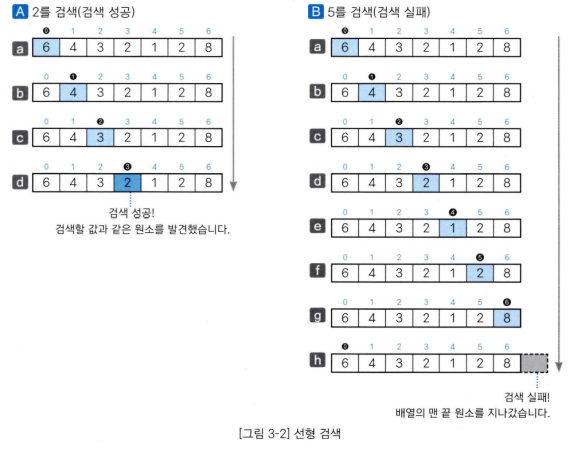

In [ ]:
# [Do it! 실습 3-1] while 문으로 작성한 선형 검색 알고리즘

from typing import Any, Sequence

def seq_search(a: Sequence, key: Any) -> int:
    """시퀀스 a에서 key값이 같은 원소를 선형 검색(while 문)"""
    i = 0

    while True:
        if i == len(a):
            return -1  # 검색에 실패하여 -1을 반환
        if a[i] == key:
            return i   # 검색에 성공하여 현재 조사한 배열의 인덱스를 반환
        i += 1

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))  # num 값을 입력
    x = [None] * num                           # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 키 ky를 입력받기

    idx = seq_search(x, ky)                     # ky와 같은 원소를 x에서 검색

    if idx == -1:
        print('검색값을 갖는 원소가 존재하지 않습니다.')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')  # 값이 key인 원소가 여러 개 존재하는 경우는
                                                 # (계속) 스캔 과정에서 맨처음 발견한 원소를 반환

원소 수를 입력하세요.: 3
x[0]: 1
x[1]: 1
x[2]: 2
검색할 값을 입력하세요.: 1
검색값은 x[0]에 있습니다.


In [ ]:
# [Do it! 실습 3-2] for 문으로 작성한 선형 검색 알고리즘

from typing import Any, Sequence

def seq_search(a: Sequence, key: Any) -> int:
    """시퀀스 a에서 key값이 같은 요소를 선형 검색(for 문)"""
    for i in range(len(a)):
        if a[i] == key:
            return i  # 검색 성공(인덱스를 반환)
    return -1         # 검색 실패(-1을 반환)


# 3-1과 동일한 코드

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))  # num 값을 입력
    x = [None] * num                           # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 키 ky를 입력받음

    idx = seq_search(x, ky)                     # ky와 값이 같은 요소를 x에서 검색

    if idx == -1:
        print('검색 값을 갖는 요소가 존재하지 않습니다.')
    else:
        print(f'검색 값은 x[{idx}]에 있습니다.')

원소 수를 입력하세요.: 4
x[0]: 4
x[1]: 2
x[2]: 4
x[3]: 1
검색할 값을 입력하세요.: 4
검색 값은 x[0]에 있습니다.


In [ ]:
 # 모듈 종류 이슈로 진행 불가
# from ssearch_while import seq_search

# [Do it! 실습 3C-1] seq_search() 함수를 사용하여 실수 검색하기
# [Do it! 실습 3C-2] seq_search() 함수를 사용하여 특정 인덱스 검색하기

## 보초법

- 보초법(sentinel method) : 선형 검새에서 종료조건을 검사하는 비용을 반으로 줄이는 방법
- 검색하고자하는 키 값을 배열의 맨 끝에 저장(추가)
- 검색할 값과 같은 원소를 발견해야 하므로 맨 끝에 도달했는지 판단은 필요하지 않음

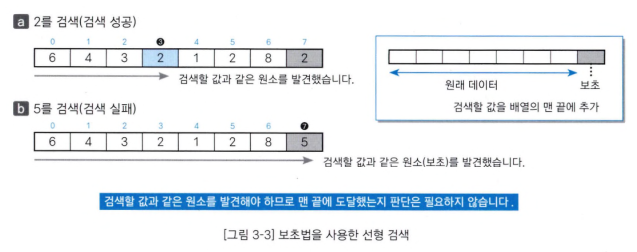

In [ ]:
# [Do it! 실습 3-3] 선형 검색 알고리즘(실습 3-1)을 보초법으로 수정

from typing import Any, Sequence
import copy

def seq_search(seq: Sequence, key: Any) -> int:
    """시퀀스 seq에서 key와 일치하는 원소를 선형 검색(보초법)"""
    a = copy.deepcopy(seq)  # seq를 복사
    a.append(key)           # 보초 key를 추가

    i = 0
    while True:  # 배열 원소를 스캔하여 검색하는 과정을 반복
        if a[i] == key:
            break  # 검색에 성공하면 while 문을 종료
        i += 1
    return -1 if i == len(seq) else i  # 반복 종료 후 찾은 원소가 배열의 원래 데이터인지 보초인지 판단
                                       # i == len(seq) : 보초, 즉 검색에 실패
                                       # 그렇지 않으면 i 반환

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))  # num 값을 입력
    x = [None] * num                           # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 키 ky를 입력받기

    idx = seq_search(x, ky)                     # ky값과 같은 원소를 x에서 검색

    if idx == -1:
         print('검색값을 갖는 원소가 존재하지 않습니다.')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

#03-3. 이진 검색

- 이진 검색(binay search) : 배열의 데이터가 정렬되어 있어야 함
- 선형검색보다 빠르게 검색할 수 있다는 장점 존재

## 이진 검색

- 원소가 오름차순/내림차순으로 정렬된 배열에서 좀 더 효율적으로 검색 가능
- 주목할 원소를 다음에 검색할 범위의 중간 지점으로 단숨에 이동

- 이진 검색 알고리즘은 반복할 때마다 검색 범위가 거의 절반으로 줄어듦
- 따라서, 검색하는 데 필요한 비교 횟수는 평균 log n (검색에 실패한 경우는 log (n+1), 검색에 성공할 경우는 lon (n-1)) ex. log2 10 = 3.01



> 검색 범위를 좁히는 과정
  - a[pc] < key : 중앙(pc)에서 오른쪽으로 한 칸 이동하여 새로운 왼쪽 끝 pl로 지정하고, 검색 범위를 뒤쪽 절반으로 좁힘
  - a[pc] > key : 중앙(pc)에서 왼쪽으로 한 칸 이동하여 새로운 오른쪽 끝 pr로 지정하고, 검색 범위를 앞쪽 절반으로 좁힘


> 이진 검색의 종료 조건
- 조건1 : a[pc] 와 key가 일치하는 경우 -> 검색 성공
- 조건2 : 검색 범위가 더 이상 없는 경우 -> 검색 실패



> 참고사항
- 검색 범위의 맨 앞(pl:0), 맨 끝(pr:n-1), 중앙(pc:(n-1)//2)
- 검색에서 제외되는 부분 : 회색 배열
- 검색 범위 : 흰색 배열

- 조건 1이 성립하여 검색에 성공한 예 : 검색 성공

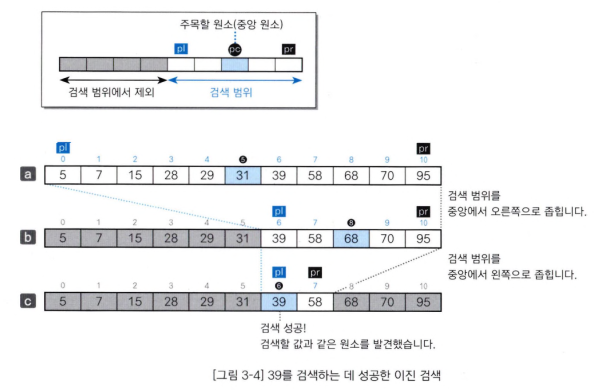

- 조건2가 성립하여 검색에 성공한 예 : 검색 실패

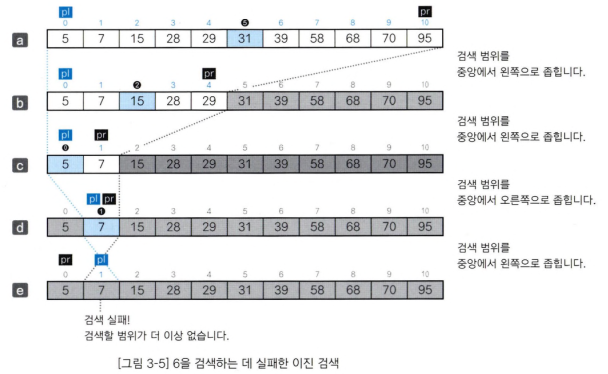

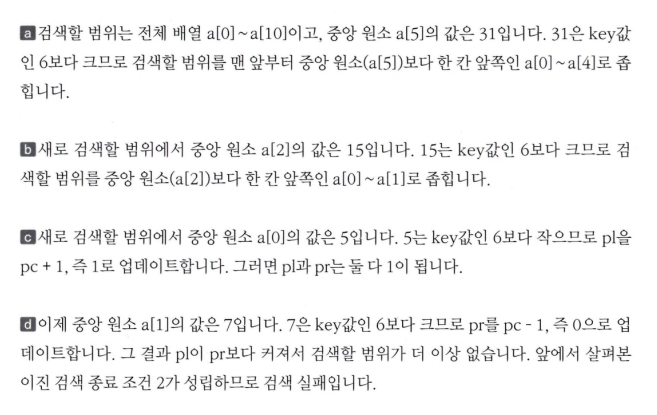

In [ ]:
# [Do it! 실습 3-3] 이진 검색 알고리즘

from typing import Any, Sequence

def bin_search(a: Sequence, key: Any) -> int:
    """시퀀스 a에서 key와 일치하는 원소를 이진 검색"""
    pl = 0           # 검색 범위 맨 앞 원소의 인덱스
    pr = len(a) - 1  # 검색 범위 맨 끝 원소의 인덱스

    while True:
        pc = (pl + pr) // 2  # 중앙 원소의 인덱스
        if a[pc] == key:
            return pc    # 검색 성공
        elif a[pc] < key:
            pl = pc + 1  # 검색 범위를 뒤쪽의 절반으로 좁힘
        else:
            pr = pc - 1  # 검색 범위를 앞쪽의 절반으로 좁힘
        if pl > pr:  # 검색할 범위가 더이상 없는 경우 ex. pl = 1, pr = 0
            break
    return -1            # 검색 실패

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성

    print('배열 데이터를 오름차순으로 입력하세요.')

    x[0] = int(input('x[0]: '))

    for i in range(1, num):
        while True:
            x[i] = int(input(f'x[{i}]: '))
            if x[i] >= x[i - 1]:  #바로 직전에 입력한 원솟값보다 큰 값을 입력
                 break

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 ky를 입력

    idx = bin_search(x, ky)                     # ky와 같은 값의 원소를 x에서 검색

    if idx < 0:
        print('검색값을 갖는 원소가 존재하지 않습니다.')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

## 복잡도

- 복잡도(Complexity) : 알고리즘의 성능을 객관적으로 평가하는 기준
  * 시간 복잡도(time complexity) : 실행하는 데 필요한 시간을 평가
  * 공간 복잡도(space complexity) : 메모리(기억 공간)와 파일 공간이 얼마나 필요한지를 평가
- 프로그램의 실행 속도(실행하는 데 필요한 시간)는 프로그램이 동작하는 하드웨어나 컴파일러 등의 조건에 따라 달라짐


> 선형 검색의 시간 복잡도
- 1번 실행 : O(1)
- 함수에서 값을 반환 : O(1)
- n에 비례하는 횟수만큼 실행되는 경우 : O(n)
- 2가지 계산으로 구성된 알고리즘의 복잡도는 차원이 더 높은 쪽의 복잡도를 우선으로 함
- 선형 알고리즘의 복잡도 : O(n)


> 이진 검색의 시간 복잡도
- 이진 검색 알고리즘의 복잡도 : O(log n)




# 03-4. 해시법

## 정렬된 배열에서 원소 추가하기

## 해시법

## 해시 충돌

## 체인법

## 오픈 주소법